<h1>The Fourier Transformation is applied in engineering to determine the dominant frequencies in a vibration signal. 
<a href="https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example/">Link </a>
</h1>
<img src="fig_2.png"></img>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 1200
# sample spacing
T = 1.0 / 1200.0
x = np.linspace(0.0, N*T, N)
y = np.sin(10.0 * 2.0*np.pi*x) + 0.6*np.sin(80.0 * 2.0*np.pi*x)+ 0.5*np.sin(90.0 * 10.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='r')

plt.subplot(2, 1, 1)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title('A tale of 2 subplots')
plt.ylabel('amplitude')

plt.subplot(2, 1, 2)
plt.plot(x, y)
plt.xlabel('time (s)')
plt.ylabel('amplitud')

plt.show()

In [10]:
# import numpy as np

def DFT(x):
    """
    Compute the discrete Fourier Transform of the 1D array x
    :param x: (array)
    """

    N = x.size
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

if __name__ == "__main__":
    a=np.empty(10); a.fill(5)
    print(DFT(a))
    

[ 5.00000000e+01+0.00000000e+00j -8.88178420e-16-8.88178420e-16j
 -1.33226763e-15+0.00000000e+00j -6.66133815e-15-7.10542736e-15j
  0.00000000e+00-8.88178420e-16j  0.00000000e+00+2.35837356e-14j
 -1.68753900e-14-7.99360578e-15j -3.59712260e-14-1.06581410e-14j
  7.54951657e-15-3.55271368e-15j -1.06581410e-14+5.77315973e-15j]


Exploring the FFT

First we define a simple signal containing an addition of two sine waves. One with a frequency of 40 Hz and one with a frequency of 90 Hz.

In the above code snippet the FFT result of the two sine waves is determined. The first two and the last two values of the FFT sequency were printed to stdout. As we can see we get complex numbers as a result. If we compare the first value of the sequence (index 0) with the last value of the sequence (index 499) we can see that the real parts of both numbers are equal and that the value of the imaginary numbers are also equal in magnitude, only one is positive and the other is negative. The numbers are each others complex conjugate. This is true for all numbers in the sequence;

For real number inputs is n the complex conjugate of N - n.

Because the second half of the sequence gives us no new information we can already conclude that the half of the FFT sequence is the output we need.

The complex output numbers of the FFT contains the following information:

Amplitude of a certain frequency sine wave (energy).
Phase offset of a certain frequency sine wave.

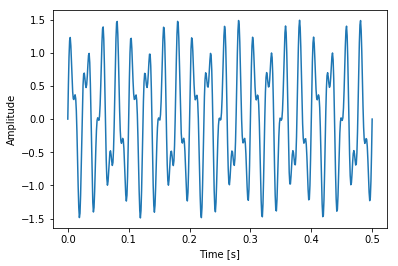

Value at index 0:	(0.00038048349283886784-0.060555031761900024j) 
Value at index 499:	(0.00038048349284022787+0.0605550317619014j)
Value at index 1:	(0.0015317714831372953-0.12188808528069542j) 
Value at index 498:	(0.0015317714831374618+0.12188808528069559j)


In [12]:
t = np.linspace(0, 0.5, 500)
s = np.sin(40 * 2 * np.pi * t) + 0.5 * np.sin(90 * 2 * np.pi * t)

plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

fft = np.fft.fft(s)


for i in range(2):
    print("Value at index {}:\t{}".format(i, fft[i + 1]), "\nValue at index {}:\t{}".format(fft.size -1 - i, fft[-1 - i]))


Each discrete number output of the FFT corresponds to a certain frequency. The frequency resolution is determined by:

deltaf=f/N



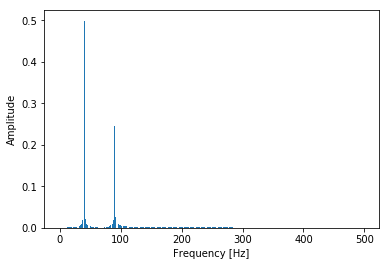

In [13]:
fft = np.fft.fft(s)
T = t[1] - t[0]  # sampling interval 
N = s.size

# 1/T = frequency
f = np.linspace(0, 1 / T, N)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
plt.show()


A FFT is a trade-off between time information and frequency information. By taking a FFT of a time signal, all time information is lost in return for frequency information. To keep information about time and frequencies in one spectrum, we must make a spectrogram. These are DFT’s taken on discrete time windows.

<h2>Fast fourier transform</h2>
<h1>
<a href="https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/">Link 1</a>
 <a href="https://towardsdatascience.com/fast-fourier-transform-937926e591cb">Link 2</a>
    </h1>
    
<img src="formula.png"></img>

In [20]:


import numpy as np
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [21]:
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

153 ms ± 26.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
47.5 µs ± 5.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)



Ahora, si usamos la simetrìa. Eliminar lo que se repite del calculo.


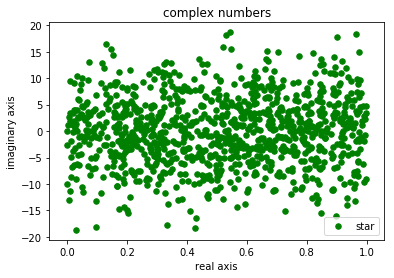

In [47]:
def FFT_vectorized(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:

        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()


x = np.random.random(1024)
np.allclose(FFT_vectorized(x), np.fft.fft(x))

result=FFT_vectorized(x)


import matplotlib.pyplot as plt

X = [x.real for x in result]
Y = [x.imag for x in result]
plt.scatter(x, Y, label="star", marker="o", color="green", s=30)
plt.xlabel('real axis')
plt.ylabel('imaginary axis')
plt.title('complex numbers')
plt.legend()
plt.show()

Otro còdigo que puede ser màs pràctico


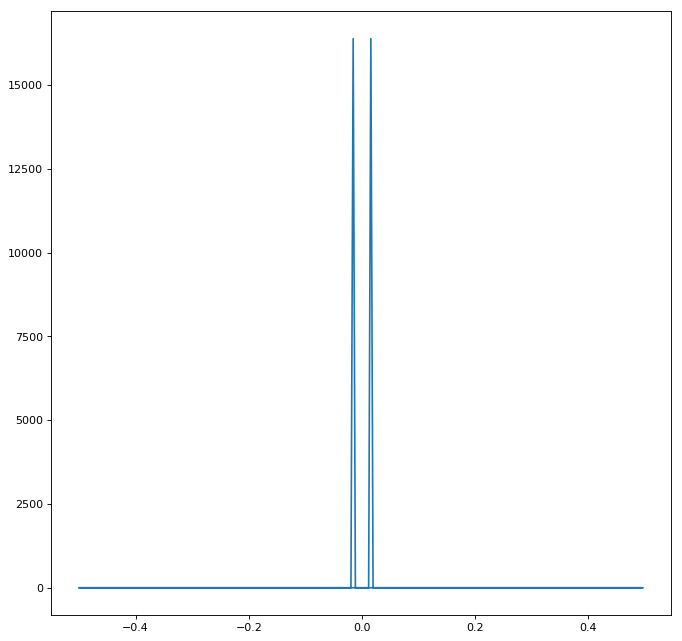

In [16]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

N = 256
t = np.arange(N)

m = 4
nu = float(m)/N
f = np.sin(2*np.pi*nu*t)
ft = np.fft.fft(f)
freq = np.fft.fftfreq(N)
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='r')
plt.plot(freq, ft.real**2 + ft.imag**2.)
plt.show()